# Exploratory data analysis

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


python3.10(14965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3.10(14966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3.10(14968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Matplotlib is building the font cache; this may take a moment.


## Import and check the dataset

In [4]:
# check the data
df = pd.read_csv('../data/raw/wearable_health_devices_performance_upto_26june2025.csv')
df.head(3)

,Test_Date,Device_Name,Brand,Model,Category,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating,User_Satisfaction_Rating,GPS_Accuracy_Meters,Connectivity_Features,Health_Sensors_Count,App_Ecosystem_Support,Performance_Score
0,2025-06-01,Fitbit Inspire 4,Fitbit,Inspire 4,Fitness Tracker,141.74,129.9,89.69,93.03,78.91,3ATM,6.5,NaN,"Bluetooth, WiFi",5,Cross-platform,68.4
1,2025-06-01,Apple Watch SE 3,Apple,Watch SE 3,Smartwatch,834.64,26.5,95.92,98.20,79.76,IP68,8.3,4.9,"WiFi, Bluetooth, NFC",8,iOS,60.1
2,2025-06-01,Fitbit Versa 4,Fitbit,Versa 4,Sports Watch,145.34,161.2,92.24,96.81,74.49,IPX8,6.0,1.7,Bluetooth,7,Cross-platform,59.3


### Overview about the dataset
The data contains 2375 entries providing information about wearable devices and the information about the quality of device, brand, model, and the device category. Most of variables describe the accuracy of the measurement by the device and the metric of performance_score is used to evaluate general quality.

Next, have a look at the summary of the variables and have some exploratory on the dataset.

In [3]:
#df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Test_Date                        2375 non-null   object 
 1   Device_Name                      2375 non-null   object 
 2   Brand                            2375 non-null   object 
 3   Model                            2375 non-null   object 
 4   Category                         2375 non-null   object 
 5   Price_USD                        2375 non-null   float64
 6   Battery_Life_Hours               2375 non-null   float64
 7   Heart_Rate_Accuracy_Percent      2375 non-null   float64
 8   Step_Count_Accuracy_Percent      2375 non-null   float64
 9   Sleep_Tracking_Accuracy_Percent  2375 non-null   float64
 10  Water_Resistance_Rating          2375 non-null   object 
 11  User_Satisfaction_Rating         2375 non-null   float64
 12  GPS_Accuracy_Meters 

,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,1743.000000,2375.000000,2375.000000
mean,359.444484,160.584463,93.483907,95.910198,78.837516,7.966484,3.247676,8.912842,64.047621
std,215.671035,234.815896,3.172078,1.665484,4.843714,0.831801,1.022825,3.559990,5.109075
min,30.000000,18.000000,85.010000,93.000000,70.000000,6.000000,1.500000,2.000000,55.100000
25%,211.875000,46.900000,92.140000,94.550000,75.610000,7.400000,2.400000,6.000000,60.400000
50%,334.370000,99.800000,94.070000,95.950000,78.300000,8.000000,3.200000,9.000000,62.200000
75%,487.930000,177.400000,95.925000,96.960000,81.930000,8.500000,4.100000,12.000000,67.700000
max,989.480000,2118.100000,98.000000,99.500000,91.970000,9.500000,5.000000,15.000000,78.300000


### Visualisation for exploring dataset

Figures below present the number of device by brand name and device category and the average price accordingly.
- Apple, Huawei, and Samsung only produce smartwatch, Oura focuses on smart ring, WHOOP targets to Fitness Band and the rest have more than 1 categogry.
- Smart watch and ring are the most expensive with the price for the ring almost equal to the watch, more than `$400`.
- Fitness band is the cheapest product that costs about `$20` only.

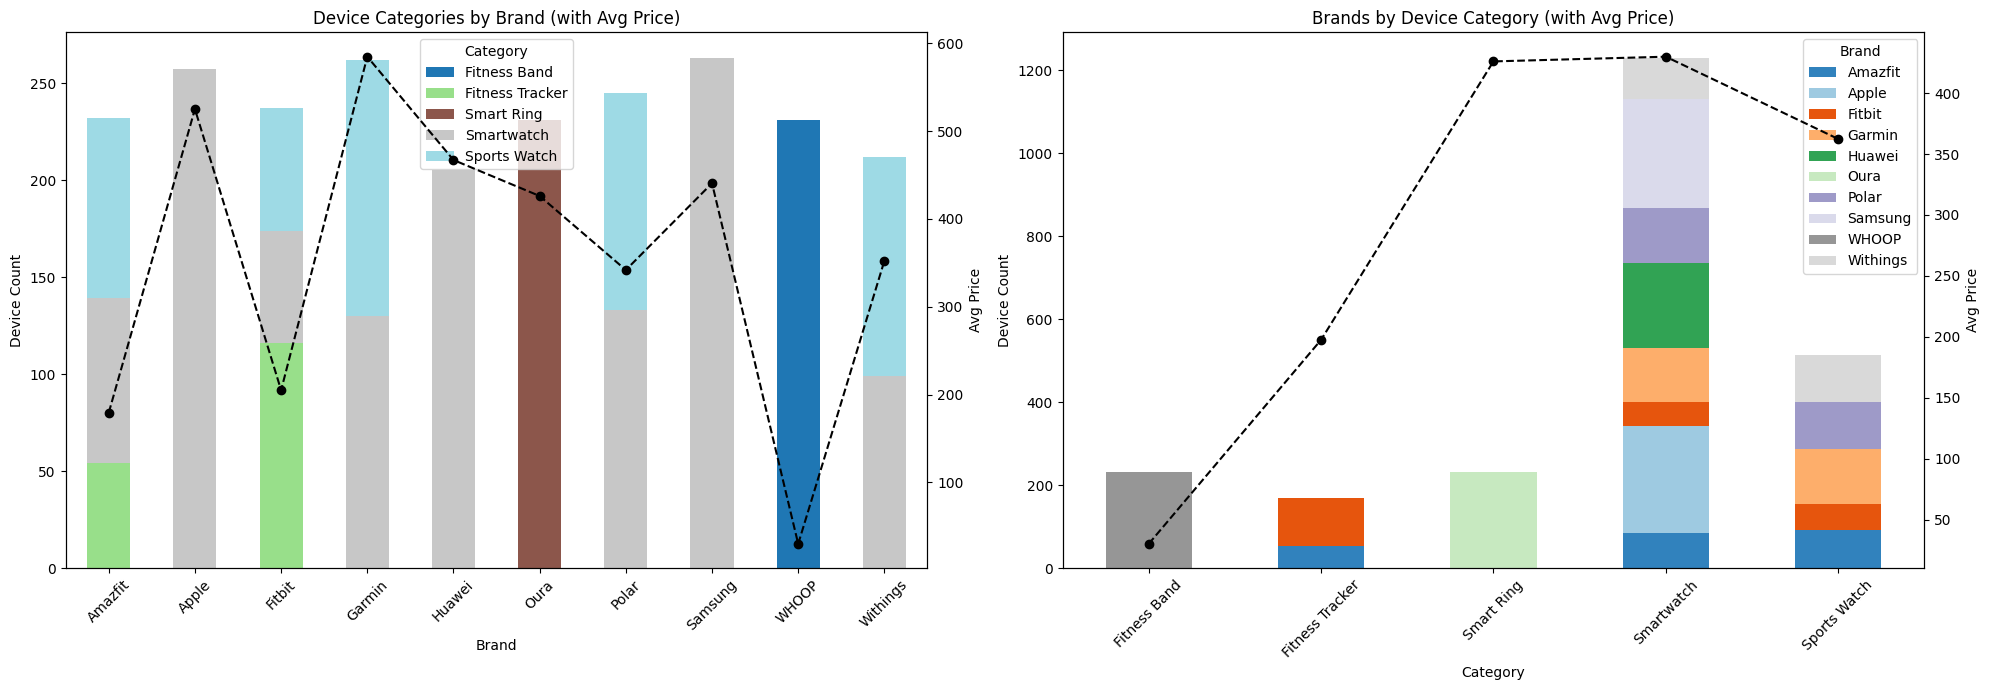

In [8]:
# Count of categories per brand (stacked bars)
cat_by_brand = df.groupby(['Brand', 'Category']).size().unstack(fill_value=0)

# Count of brands per category (stacked bars)
brand_by_cat = df.groupby(['Category', 'Brand']).size().unstack(fill_value=0)

# Average price per brand and category
avg_price_brand = df.groupby('Brand')['Price_USD'].mean().loc[cat_by_brand.index]
avg_price_cat = df.groupby('Category')['Price_USD'].mean().loc[brand_by_cat.index]

# ===== 📈 2. Plot Setup =====

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# --- Left: Categories by Brand ---
ax1 = axes[0]
ax2 = ax1.twinx()

cat_by_brand.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')
avg_price_brand.plot(ax=ax2, color='black', marker='o', linestyle='--', label='Avg Price')

ax1.set_title('Device Categories by Brand (with Avg Price)')
ax1.set_ylabel('Device Count')
ax2.set_ylabel('Avg Price')
ax1.set_xlabel('Brand')
ax1.tick_params(axis='x', rotation=45)

# --- Right: Brands by Category ---
ax3 = axes[1]
ax4 = ax3.twinx()

brand_by_cat.plot(kind='bar', stacked=True, ax=ax3, colormap='tab20c')
avg_price_cat.plot(ax=ax4, color='black', marker='o', linestyle='--', label='Avg Price')

ax3.set_title('Brands by Device Category (with Avg Price)')
ax3.set_ylabel('Device Count')
ax4.set_ylabel('Avg Price')
ax3.set_xlabel('Category')
ax3.tick_params(axis='x', rotation=45)

# Final layout
plt.tight_layout()
plt.show()

Next, evaluating general quality of the devices through performance score and user satisfaction

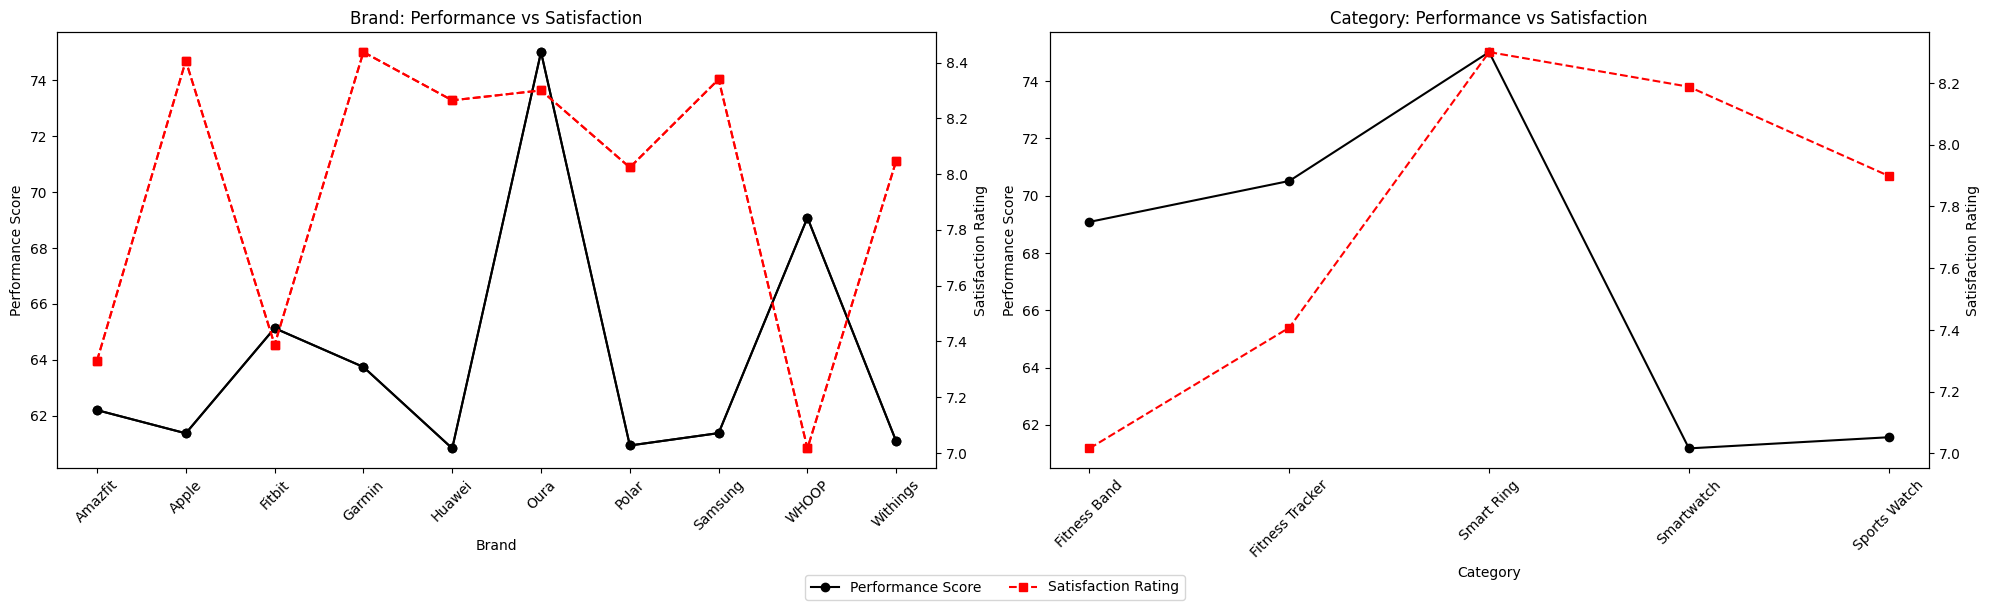

In [14]:
# Grouped averages
perf_brand = df.groupby('Brand')['Performance_Score'].mean().sort_index()
satis_brand = df.groupby('Brand')['User_Satisfaction_Rating'].mean().loc[perf_brand.index]

perf_cat = df.groupby('Category')['Performance_Score'].mean().sort_index()
satis_cat = df.groupby('Category')['User_Satisfaction_Rating'].mean().loc[perf_cat.index]

# Plot layout
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# === Left: Brand plot ===
ax1 = axes[0]
ax2 = ax1.twinx()

line1, = ax1.plot(perf_brand.index, perf_brand.values, color='black', marker='o', label='Performance Score')
line2, = ax2.plot(satis_brand.index, satis_brand.values, color='red', marker='s', linestyle='--', label='Satisfaction Rating')

ax1.plot(perf_brand.index, perf_brand.values, color='black', marker='o', label='Performance Score')
ax2.plot(satis_brand.index, satis_brand.values, color='red', marker='s', linestyle='--', label='Satisfaction Rating')

ax1.set_title('Brand: Performance vs Satisfaction')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Performance Score')
ax2.set_ylabel('Satisfaction Rating')
ax1.tick_params(axis='x', rotation=45)

# === Right: Category plot ===
ax3 = axes[1]
ax4 = ax3.twinx()

ax3.plot(perf_cat.index, perf_cat.values, color='black', marker='o', label='Performance Score')
ax4.plot(satis_cat.index, satis_cat.values, color='red', marker='s', linestyle='--', label='Satisfaction Rating')

ax3.set_title('Category: Performance vs Satisfaction')
ax3.set_xlabel('Category')
ax3.set_ylabel('Performance Score')
ax4.set_ylabel('Satisfaction Rating')
ax3.tick_params(axis='x', rotation=45)

# === Shared Legend ===
lines = [line1, line2]  # just use one set for legend (they are identical)
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc='lower center', ncol=2, fontsize='medium', bbox_to_anchor=(0.5, -0.02))

# Tight layout
plt.tight_layout()
plt.show()